In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras import regularizers
import cv2
import sys
from keras.preprocessing import image
from google.colab.patches import cv2_imshow

Using TensorFlow backend.


In [3]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))


170500096/170498071 [==============================] - 2s 0us/step


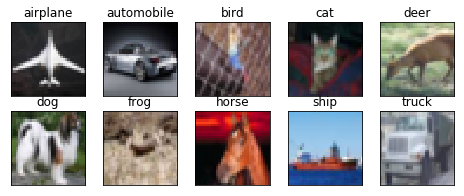

In [4]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

**Assignment-6A**

In [0]:
from keras import optimizers
from keras.callbacks import ModelCheckpoint, LearningRateScheduler

In [0]:
from keras.preprocessing.image import ImageDataGenerator

In [0]:
def get_random_eraser(p=0.5, s_l=0.02, s_h=0.4, r_1=0.3, r_2=1/0.3, v_l=0, v_h=255, pixel_level=False):
    def eraser(input_img):
        img_h, img_w, img_c = input_img.shape
        p_1 = np.random.rand()

        if p_1 > p:
            return input_img

        while True:
            s = np.random.uniform(s_l, s_h) * img_h * img_w
            r = np.random.uniform(r_1, r_2)
            w = int(np.sqrt(s / r))
            h = int(np.sqrt(s * r))
            left = np.random.randint(0, img_w)
            top = np.random.randint(0, img_h)

            if left + w <= img_w and top + h <= img_h:
                break

        if pixel_level:
            c = np.random.uniform(v_l, v_h, (h, w, img_c))
        else:
            c = np.random.uniform(v_l, v_h)

        input_img[top:top + h, left:left + w, :] = c

        return input_img

    return eraser

In [0]:
datagen = ImageDataGenerator(featurewise_center=True,
                             featurewise_std_normalization=True,
                             horizontal_flip=False)

In [0]:
datagen.fit(train_features)

In [56]:
# Define the model
model = Sequential()
model.add(Convolution2D(96, 3, 3, border_mode='same',  input_shape=(32, 32, 3), name = 'layer-1')) ## RF 3x3, cs 
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Convolution2D(96, 3, 3 , border_mode='same', name = 'layer-2')) ## RF 5x5
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Convolution2D(192, 3, 3 , border_mode='same', name = 'layer-3')) ## RF 7x7
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Convolution2D(192, 1, 1, name = 'layer-1-1' )) ## 7x7 
model.add(MaxPooling2D(pool_size=(2, 2))) ## rf 14x14
model.add(Dropout(0.025))
model.add(Convolution2D(96, 3, 3 ,  border_mode='same', name = 'layer-4')) ## rf 16x16
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Convolution2D(96, 3, 3 ,  border_mode='same', name = 'layer-5')) ## rf 18x18
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Convolution2D(192, 3, 3 , border_mode='same', name = 'layer-6')) ## rf 20x20
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Convolution2D(192, 1, 1, name = 'layer-1-2' )) ## rf 20x20
model.add(MaxPooling2D(pool_size=(2, 2))) ## rf 40x40
model.add(Dropout(0.025))
model.add(Convolution2D(96, 3, 3 ,  border_mode='same', name = 'layer-7')) ## rf 42x42
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Convolution2D(96, 3, 3 ,  border_mode='same', name = 'layer-8')) ## rf 44x44
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Convolution2D(192, 3, 3 , border_mode='same', name = 'layer-9')) ## rf 46x46
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Convolution2D(192, 1, 1, name = 'layer-1-3' )) ## rf 46x46
model.add(MaxPooling2D(pool_size=(2, 2))) ## rf 92x92
model.add(Dropout(0.025))
model.add(Convolution2D(96, 3, 3 ,border_mode='same', name = 'layer-10')) ## rf 94x94
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Convolution2D(96, 3, 3 , border_mode='same', name = 'layer-11')) ## rf 96x96
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Convolution2D(192, 3, 3 , border_mode='same', name = 'layer-12')) ## rf 98x98
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Convolution2D(192, 1, 1 , name = 'layer-1-4')) ## rf 98x98
model.add(MaxPooling2D(pool_size=(2, 2))) ## rf 196x196
model.add(Dropout(0.025))
model.add(Convolution2D(40, 1, name = 'layer-1-5' )) ## rf 198x198
model.add(MaxPooling2D(pool_size=(2, 2))) ## rf 396x396
model.add(BatchNormalization())
model.add(Convolution2D(10, 1 , name = 'layer-1-6'))  ## rf 398x398
##model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Activation('softmax'))
# Compile the model
##model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), input_shape=(32, 32, 3..., name="layer-1", padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), name="layer-2", padding="same")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3, 3), name="layer-3", padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (1, 1), name="layer-1-1")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), name="layer-4", padding="same")`
  
/usr/local/lib/python3.6/dist-

In [57]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer-1 (Conv2D)             (None, 32, 32, 96)        2688      
_________________________________________________________________
batch_normalization_43 (Batc (None, 32, 32, 96)        384       
_________________________________________________________________
activation_40 (Activation)   (None, 32, 32, 96)        0         
_________________________________________________________________
layer-2 (Conv2D)             (None, 32, 32, 96)        83040     
_________________________________________________________________
batch_normalization_44 (Batc (None, 32, 32, 96)        384       
_________________________________________________________________
activation_41 (Activation)   (None, 32, 32, 96)        0         
_________________________________________________________________
layer-3 (Conv2D)             (None, 32, 32, 192)       166080    
__________

In [0]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])

In [0]:
filepath="/content/drive/My Drive/EVA-Assignment-9-weights/EVA-Assignment-9-weights.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', save_best_only=True,verbose=1,save_weights_only=True,period=1,mode='max')
callbacks_list = [checkpoint]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., callbacks=[<keras.ca..., steps_per_epoch=97, epochs=30)`
  """


Epoch 1/30

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
97/97 [==============================] - 50s 519ms/step - loss: 1.6123 - acc: 0.4215 - val_loss: 3.1758 - val_acc: 0.1236

Epoch 00001: val_acc improved from -inf to 0.12360, saving model to /content/drive/My Drive/EVA-Assignment-9-weights/EVA-Assignment-9-weights.hdf5
Epoch 2/30

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
97/97 [==============================] - 41s 425ms/step - loss: 1.1101 - acc: 0.6246 - val_loss: 3.3496 - val_acc: 0.1341

Epoch 00002: val_acc improved from 0.12360 to 0.13410, saving model to /content/drive/My Drive/EVA-Assignment-9-weights/EVA-Assignment-9-weights.hdf5
Epoch 3/30

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
97/97 [==============================] - 41s 424ms/step - loss: 0.8081 - acc: 0.7382 - val_loss: 2.7255 - val_acc: 0.2181

Epoch 00003: val_acc improved from 0.13410 to 0.21810, saving model to /content/dri

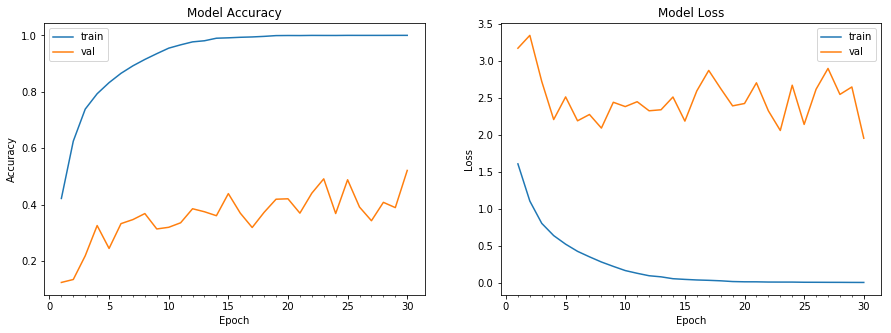

Accuracy on test data is: 52.09


In [60]:
# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 512),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 30, 
                                 validation_data = (test_features, test_labels), callbacks=[checkpoint,LearningRateScheduler(scheduler, verbose=1)])
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

In [0]:
model.load_weights("/content/drive/My Drive/EVA-Assignment-9-weights/EVA-Assignment-9-weights.hdf5") ## Load the weights that gave highest validation accuracy

**Without normalizing**

W0718 06:04:22.699572 140566515165056 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


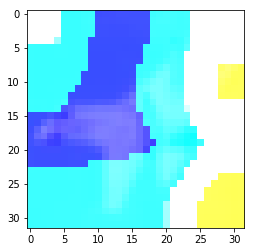

In [62]:
x = image.img_to_array(train_features[10])
x = np.expand_dims(x, axis = 0)
preds = model.predict(x)
class_idx = np.argmax(preds[0])
class_output = model.output[:, class_idx]
last_conv_layer = model.get_layer("layer-11")
grads = K.gradients(class_output, last_conv_layer.output)[0]
pooled_grads = K.mean(grads, axis=(0, 1, 2))
iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
pooled_grads_value, conv_layer_output_value = iterate([x])
for i in range(96):
      conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
      heatmap = np.mean(conv_layer_output_value, axis=-1)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
img = test_features[10]
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0, dtype = cv2.CV_32F)
plt.imshow(superimposed_img)

**after deducting mean only**

W0718 06:04:29.201588 140566515165056 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


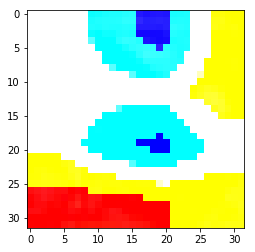

In [63]:
x = image.img_to_array(train_features[30])
x = np.expand_dims(x, axis = 0)
preds = model.predict(x)
class_idx = np.argmax(preds[0])
class_output = model.output[:, class_idx]
last_conv_layer = model.get_layer("layer-11")
grads = K.gradients(class_output, last_conv_layer.output)[0]
pooled_grads = K.mean(grads, axis=(0, 1, 2))
iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
pooled_grads_value, conv_layer_output_value = iterate([x])
for i in range(96):
      conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
      heatmap = np.mean(conv_layer_output_value, axis=-1)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
img = test_features[30]
img = img-np.mean(img, axis = 0)
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0, dtype = cv2.CV_32F)
plt.imshow(superimposed_img)

**after normalizing**

W0718 06:04:46.580522 140566515165056 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


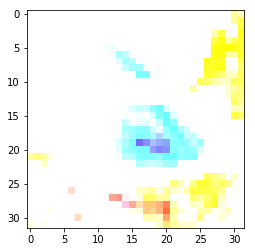

In [64]:
x = image.img_to_array(train_features[30])
x = np.expand_dims(x, axis = 0)
preds = model.predict(x)
class_idx = np.argmax(preds[0])
class_output = model.output[:, class_idx]
last_conv_layer = model.get_layer("layer-11")
grads = K.gradients(class_output, last_conv_layer.output)[0]
pooled_grads = K.mean(grads, axis=(0, 1, 2))
iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
pooled_grads_value, conv_layer_output_value = iterate([x])
for i in range(96):
      conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
      heatmap = np.mean(conv_layer_output_value, axis=-1)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
img = test_features[30]
img /= np.std(img, axis = 0)
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0, dtype = cv2.CV_32F)
plt.imshow(superimposed_img)

**after deducting mean and normalizing**

In [0]:
def heat_map(j):
  x = image.img_to_array(train_features[j])
  x = np.expand_dims(x, axis = 0)
  preds = model.predict(x)
  class_idx = np.argmax(preds[0])
  class_output = model.output[:, class_idx]
  last_conv_layer = model.get_layer("layer-11")
  grads = K.gradients(class_output, last_conv_layer.output)[0]
  pooled_grads = K.mean(grads, axis=(0, 1, 2))
  iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
  pooled_grads_value, conv_layer_output_value = iterate([x])
  for i in range(96):
      conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
      heatmap = np.mean(conv_layer_output_value, axis=-1)
  heatmap = np.maximum(heatmap, 0)
  heatmap /= np.max(heatmap)
  img = test_features[j]
  img = img-np.mean(img, axis = 0)
  img /= np.std(img, axis = 0)
  heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
  heatmap = np.uint8(255 * heatmap)
  heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
  superimposed_img = cv2.addWeighted(img, 0.5, heatmap, 0.5, 0, dtype = cv2.CV_32F)
  plt.imshow(superimposed_img)

W0718 06:10:06.302592 140566515165056 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()
W0718 06:10:08.579041 140566515165056 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0718 06:10:10.795994 140566515165056 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()
W0718 06:10:13.060393 140566515165056 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


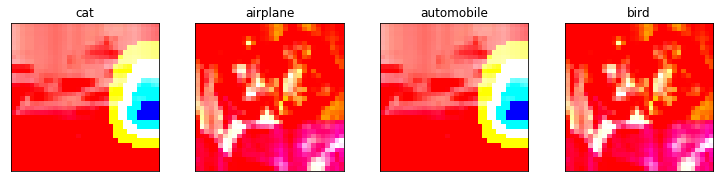

In [69]:
new_num_classes = 4
##new_class_names = ['airplane','automobile','bird','cat']
fig = plt.figure(figsize=(16,6))
high = 4
low = 1
for i in range(new_num_classes):
  ##for k in new_class_names:
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[low:high]==i)[0]
    features_idx = train_features[low:high]
    img_num = np.random.randint(features_idx.shape[0])
    ##print('img_num ',img_num)
    ax.set_title(new_class_names[i-1])
    heat_map(img_num)




**CUTOUT**

In [0]:
def cut_out(j):
  x = image.img_to_array(train_features[j])
  x = np.expand_dims(x, axis = 0)
  preds = model.predict(x)
  class_idx = np.argmax(preds[0])
  class_output = model.output[:, class_idx]
  last_conv_layer = model.get_layer("layer-11")
  grads = K.gradients(class_output, last_conv_layer.output)[0]
  pooled_grads = K.mean(grads, axis=(0, 1, 2))
  iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
  pooled_grads_value, conv_layer_output_value = iterate([x])
  plt.imshow(eraser(x[i]), interpolation="nearest")
  plt.axis('off')
  plt.savefig("example2.png")

In [0]:
cutout_datagen = ImageDataGenerator(featurewise_center=True,
                             featurewise_std_normalization=True,
                             horizontal_flip=False,
                             preprocessing_function=get_random_eraser(v_l=0, v_h=1))


In [0]:
cutout_datagen.fit(train_features)

In [46]:
# Define the model
model = Sequential()
model.add(Convolution2D(96, 3, 3, border_mode='same',  input_shape=(32, 32, 3), name = 'layer-1')) ## RF 3x3, cs 
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Convolution2D(96, 3, 3 , border_mode='same', name = 'layer-2')) ## RF 5x5
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Convolution2D(192, 3, 3 , border_mode='same', name = 'layer-3')) ## RF 7x7
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Convolution2D(192, 1, 1, name = 'layer-1-1' )) ## 7x7 
model.add(MaxPooling2D(pool_size=(2, 2))) ## rf 14x14
model.add(Dropout(0.025))
model.add(Convolution2D(96, 3, 3 ,  border_mode='same', name = 'layer-4')) ## rf 16x16
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Convolution2D(96, 3, 3 ,  border_mode='same', name = 'layer-5')) ## rf 18x18
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Convolution2D(192, 3, 3 , border_mode='same', name = 'layer-6')) ## rf 20x20
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Convolution2D(192, 1, 1, name = 'layer-1-2' )) ## rf 20x20
model.add(MaxPooling2D(pool_size=(2, 2))) ## rf 40x40
model.add(Dropout(0.025))
model.add(Convolution2D(96, 3, 3 ,  border_mode='same', name = 'layer-7')) ## rf 42x42
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Convolution2D(96, 3, 3 ,  border_mode='same', name = 'layer-8')) ## rf 44x44
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Convolution2D(192, 3, 3 , border_mode='same', name = 'layer-9')) ## rf 46x46
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Convolution2D(192, 1, 1, name = 'layer-1-3' )) ## rf 46x46
model.add(MaxPooling2D(pool_size=(2, 2))) ## rf 92x92
model.add(Dropout(0.025))
model.add(Convolution2D(96, 3, 3 ,border_mode='same', name = 'layer-10')) ## rf 94x94
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Convolution2D(96, 3, 3 , border_mode='same', name = 'layer-11')) ## rf 96x96
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Convolution2D(192, 3, 3 , border_mode='same', name = 'layer-12')) ## rf 98x98
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Convolution2D(192, 1, 1 , name = 'layer-1-4')) ## rf 98x98
model.add(MaxPooling2D(pool_size=(2, 2))) ## rf 196x196
model.add(Dropout(0.025))
model.add(Convolution2D(40, 1, name = 'layer-1-5' )) ## rf 198x198
model.add(MaxPooling2D(pool_size=(2, 2))) ## rf 396x396
model.add(BatchNormalization())
model.add(Convolution2D(10, 1 , name = 'layer-1-6'))  ## rf 398x398
##model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Activation('softmax'))
# Compile the model
##model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), input_shape=(32, 32, 3..., name="layer-1", padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), name="layer-2", padding="same")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3, 3), name="layer-3", padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (1, 1), name="layer-1-1")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), name="layer-4", padding="same")`
  
/usr/local/lib/python3.6/dist-

In [47]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer-1 (Conv2D)             (None, 32, 32, 96)        2688      
_________________________________________________________________
batch_normalization_29 (Batc (None, 32, 32, 96)        384       
_________________________________________________________________
activation_27 (Activation)   (None, 32, 32, 96)        0         
_________________________________________________________________
layer-2 (Conv2D)             (None, 32, 32, 96)        83040     
_________________________________________________________________
batch_normalization_30 (Batc (None, 32, 32, 96)        384       
_________________________________________________________________
activation_28 (Activation)   (None, 32, 32, 96)        0         
_________________________________________________________________
layer-3 (Conv2D)             (None, 32, 32, 192)       166080    
__________

In [0]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])

In [0]:
filepath="/content/drive/My Drive/EVA-Assignment-9-weights/EVA-Assignment-9-cutout_weights.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', save_best_only=True,verbose=1,save_weights_only=True,period=1,mode='max')
callbacks_list = [checkpoint]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., callbacks=[<keras.ca..., steps_per_epoch=97, epochs=30)`
  """


Epoch 1/30

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
97/97 [==============================] - 49s 502ms/step - loss: 1.6925 - acc: 0.3838 - val_loss: 3.3413 - val_acc: 0.1586

Epoch 00001: val_acc improved from -inf to 0.15860, saving model to /content/drive/My Drive/EVA-Assignment-9-weights/EVA-Assignment-9-cutout_weights.hdf5
Epoch 2/30

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
97/97 [==============================] - 41s 423ms/step - loss: 1.2511 - acc: 0.5633 - val_loss: 2.6232 - val_acc: 0.1737

Epoch 00002: val_acc improved from 0.15860 to 0.17370, saving model to /content/drive/My Drive/EVA-Assignment-9-weights/EVA-Assignment-9-cutout_weights.hdf5
Epoch 3/30

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
97/97 [==============================] - 41s 425ms/step - loss: 1.0034 - acc: 0.6566 - val_loss: 2.1398 - val_acc: 0.3105

Epoch 00003: val_acc improved from 0.17370 to 0.31050, saving model t

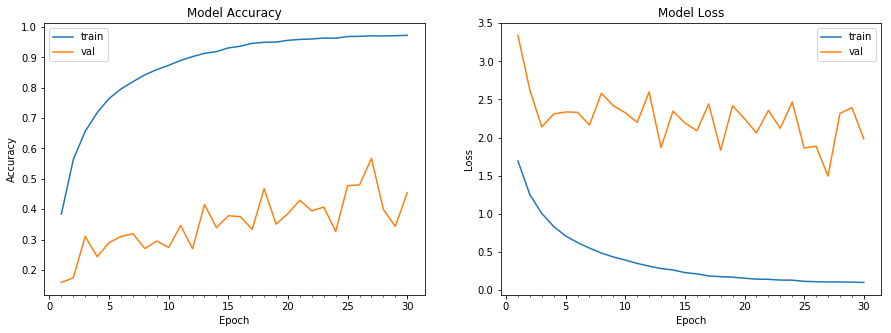

Accuracy on test data is: 45.43


In [50]:
# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(cutout_datagen.flow(train_features, train_labels, batch_size = 512),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 30, 
                                 validation_data = (test_features, test_labels), callbacks=[checkpoint,LearningRateScheduler(scheduler, verbose=1)])
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

In [0]:
eraser = get_random_eraser(pixel_level=True)

W0718 06:13:05.683629 140566515165056 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0718 06:13:05.773040 140566515165056 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0718 06:13:05.857385 140566515165056 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0718 06:13:05.944142 140566515165056 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


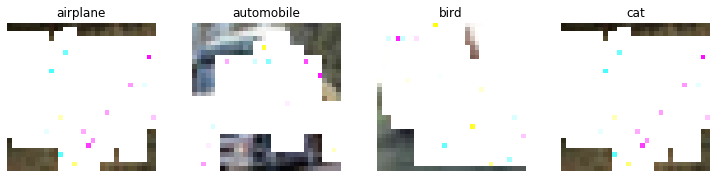

In [71]:
new_num_classes = 4
##new_class_names = ['airplane','automobile','bird','cat']
fig = plt.figure(figsize=(16,6))
high = 4
low = 1

##for k in new_class_names:
for i in range(new_num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[low:high]==i)[0]
    features_idx = train_features[low:high]
    img_num = np.random.randint(features_idx.shape[0])
    ##print('img_num ',img_num)
    ax.set_title(new_class_names[i])
    plt.imshow(eraser(features_idx[i-1]), interpolation="nearest")
    plt.axis('off')
    plt.savefig("example2.png")
